#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [17]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [18]:
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
is_duplicate = df.duplicated().any()
print("", is_duplicate)


 True


Periksa apakah ada missing values

In [19]:
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
missing_values = df.isnull().any()
print(missing_values)


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

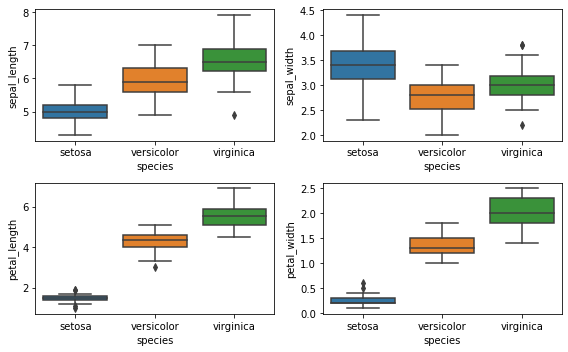

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(data=df, x="species", y=feature, ax=axes[row, col])
plt.tight_layout()
plt.show()


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [5]:
df = pd.read_csv(url)
X = df.drop('species', axis=1)
y = df['species']
print("Variabel Independen (Fitur):")
print(X.head())
print("\nVariabel Dependen (Target):")
print(y.head())


Variabel Independen (Fitur):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Variabel Dependen (Target):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [4]:
from sklearn.model_selection import train_test_split
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Jumlah data dalam dataset latih (train):", len(X_train))
print("Jumlah data dalam dataset uji (test):", len(X_test))


Jumlah data dalam dataset latih (train): 135
Jumlah data dalam dataset uji (test): 15


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(url)
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Contoh data setelah scaling (X_train_scaled):")
print(X_train_scaled[:5])


Contoh data setelah scaling (X_train_scaled):
[[ 0.56195149  0.56791065  0.51776964  0.51036026]
 [ 0.80278784 -0.12487192  1.14441016  1.30078436]
 [-0.28097574 -1.27950953  0.06203108 -0.1483265 ]
 [-0.16055757 -0.58672696  0.403835    0.1151482 ]
 [ 0.68236966 -0.58672696  1.03047552  1.30078436]]


#Logistic Regression

Bangun model dan ukur accuracy nya

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Model Logistic Regression yang dibangun:")
print(model_lr)
print("\nAkurasi Model Logistic Regression:", accuracy)


Model Logistic Regression yang dibangun:
LogisticRegression(random_state=0)

Akurasi Model Logistic Regression: 1.0


Uji model dengan dataset test

In [4]:
y_pred_lr = model_lr.predict(X_test_scaled)
print(y_pred_lr)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_mtx = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix")
print(confusion_mtx)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score:", accuracy)

Confusion Matrix
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [5]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
print(model_nb)

GaussianNB()


Uji hasil model dengan data test

In [9]:
y_pred_nb = model_nb.predict(X_test_scaled)
print(y_pred_nb)


['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_nb = GaussianNB().fit(X_train_scaled, y_train)
y_pred_nb = model_nb.predict(X_test_scaled)
confusion_mtx_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Confusion Matrix:\n", confusion_mtx_nb)
print("Accuracy:", accuracy_nb)

Confusion Matrix:
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(metric='euclidean').fit(X_train_scaled, y_train)
print(model_knn)


KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [13]:
y_pred_knn = model_knn.predict(X_test_scaled)
print(y_pred_knn)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_knn = model_knn.predict(X_test_scaled)
confusion_mtx_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion_mtx_knn)
print("Accuracy Score:", accuracy_knn)


Confusion Matrix:
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [ ]:
Dari ketiga klasifikasi, klasifikasi yang memiliki akurasi tertinggi adalah logistic regression dan K-Nearest Neighbour (K-NN) dengan accuracy score 1 sedangkan Naive Bays hanya memiliki nilai 0.93.